In [1]:
import gdal
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

In [2]:
# Set data frame options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# pd.set_option('display.max_colwidth', None)

In [ ]:
## PLOT TIFF TO FIND CORRECT FILE ##

In [5]:
# Set values for correct DEM file

# INDIA
# n = 21, e = 81 # Best
# n = 19, e = 83 # Worst

# IRAN
# n = 27, e = 59 # Best
# n = 30, e = 59 # Worst

# CONGO
# n = -11, e = 27 # Best
# n = -9, e = 27 # Worst
n = -11, e = 23 # Forest

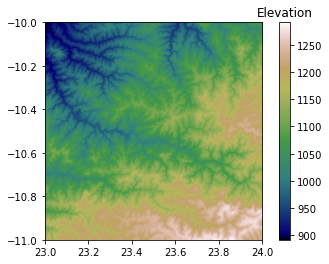

In [7]:
gdal.UseExceptions()

if n < 0:
    lat = 's'
else:
    lat = 'n'
    
if e < 0:
    long = 'w'
else:
    long = 'e'

file_name = lat + str(abs(n)).zfill(2) + '_' + long + '0' + str(abs(e)).zfill(2) + '_1arc_v3.tif'
    

ds = gdal.Open('/Users/madsrindal/Desktop/DEMs/DEM Congo/' + file_name)
# ds = gdal.Open('/Users/madsrindal/Downloads/GMTED2010N30E060_075/30n060e_20101117_gmted_dsc075.tif')
elevation = ds.ReadAsArray()


nrows, ncols = elevation.shape
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()

x1 = x0 + dx * ncols
y1 = y0 + dy * nrows

plt.imshow(elevation, cmap='gist_earth', extent=[x0, x1, y1, y0])
bar = plt.colorbar()
bar.ax.set_title('Elevation')
plt.show()

In [8]:
def filter_location_dem(df, location):
    filtered_df = df[df.lat < location[0]]
    filtered_df = filtered_df[filtered_df.lat > location[2]]
    filtered_df = filtered_df[filtered_df.long < location[3]]
    filtered_df = filtered_df[filtered_df.long > location[1]]
    return filtered_df

In [9]:
create_specific_dem = False

if create_specific_dem:

    main_loc = [32.5, 69.6, 24.7, 79.8]

    gdal.UseExceptions()

    lat_values = []
    lon_values = []
    elev_values = []

    # TOP IMAGE
    ds = gdal.Open('/Users/madsrindal/Downloads/GMTED2010N30E060_075/30n060e_20101117_gmted_dsc075.tif')
    elevation = ds.ReadAsArray()

    nrows, ncols = elevation.shape
    x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()

    # Start at top left corner
    for y in tqdm(range(0, nrows)):
        for x in range(0, ncols):
            lat = y0 + dy*y
            lon = x0 + dx*x
            lat_values.append(lat)
            lon_values.append(lon)
            elev_values.append(elevation[y][x])

    print('Creating a data frame with the elevation values...')
    top_df = pd.DataFrame()
    top_df['lat'] = lat_values
    top_df['long'] = lon_values
    top_df['elevation'] = elev_values
    top_df = filter_location_dem(top_df, main_loc)

    ##############################################################################################################

    gdal.UseExceptions()

    lat_values = []
    lon_values = []
    elev_values = []

    # BOTTOM IMAGE
    ds = gdal.Open('/Users/madsrindal/Downloads/GMTED2010N10E060_075/10n060e_20101117_gmted_dsc075.tif')
    elevation = ds.ReadAsArray()

    nrows, ncols = elevation.shape
    x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()

    # Start at top left corner
    for y in tqdm(range(0, nrows)):
        for x in range(0, ncols):
            lat = y0 + dy*y
            lon = x0 + dx*x
            lat_values.append(lat)
            lon_values.append(lon)
            elev_values.append(elevation[y][x])

    print('Creating a data frame with the elevation values...')
    bottom_df = pd.DataFrame()
    bottom_df['lat'] = lat_values
    bottom_df['long'] = lon_values
    bottom_df['elevation'] = elev_values
    bottom_df = filter_location_dem(bottom_df, main_loc)

    ##############################################################################################################

    area_df = top_df.append(bottom_df, ignore_index=True)

    # area_df.to_csv('/Users/madsrindal/Desktop/dem_indian_area.csv', index=False)
    area_df = pd.read_csv('/Users/madsrindal/Desktop/dem_indian_area.csv')

    small_loc = [29, 72, 24.7, 78]
    area_df = filter_location_dem(area_df, small_loc)

    sorted_area_df = area_df.sort_values(['lat', 'long'], ascending = [False, True])
    sorted_area_df.head()

    print(sorted_area_df['lat'].min())
    print(sorted_area_df['lat'].max())

    print(sorted_area_df['long'].min())
    print(sorted_area_df['long'].max())

    nrows = len(sorted_area_df['lat'].unique())
    ncols = len(sorted_area_df['long'].unique())
    elevs = np.reshape(list(sorted_area_df['elevation']), (nrows, ncols))

    x0 = small_loc[1]
    x1 = small_loc[3]

    y0 = small_loc[2]
    y1 = small_loc[0]

    plt.imshow(elevs, cmap='gist_earth', extent=[x0, x1, y0, y1])
    bar = plt.colorbar()
    bar.ax.set_title('Elevation [m]')
    plt.title('Digital Elevation Model')
    plt.xlabel('Longitude [°]')
    plt.ylabel('Latitude [°]')
    plt.savefig('/Users/madsrindal/Desktop/DEM_Indian_Area.svg')
    plt.show()

In [10]:
gdal.UseExceptions()

lat_values = []
lon_values = []
elev_values = []

if n < 0:
    lat = 's'
else:
    lat = 'n'
    
if e < 0:
    long = 'w'
else:
    long = 'e'

file_name = lat + str(abs(n)).zfill(2) + '_' + long + '0' + str(abs(e)).zfill(2) + '_1arc_v3.tif'
ds = gdal.Open('/Users/madsrindal/Desktop/DEMs/DEM congo/' + file_name)
elevation = ds.ReadAsArray()

nrows, ncols = elevation.shape
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()

# Start at top left corner
for y in tqdm(range(0, nrows)):
    for x in range(0, ncols):
        lat = y0 + dy*y
        lon = x0 + dx*x
        lat_values.append(lat)
        lon_values.append(lon)
        elev_values.append(elevation[y][x])

print('Creating a data frame with the elevation values...')
elevation_df = pd.DataFrame()
elevation_df['lat'] = lat_values
elevation_df['long'] = lon_values
elevation_df['elevation'] = elev_values

100%|██████████| 3601/3601 [00:10<00:00, 353.55it/s]


Creating a data frame with the elevation values...


In [11]:
# Set 0.5x0.5 area

# INDIA
# pixel_loc = [21.5, 81.5, 21, 82] # Best Cell
# pixel_loc = [20, 83.5, 19.5, 84] # Worst Cell

# IRAN
# pixel_loc = [27.5, 59, 27, 59.5] # Best Cell
# pixel_loc = [30.5, 59.5, 30, 60] # Worst Cell

# CONGO
# pixel_loc = [-10, 27, -10.5, 27.5] # Best Cell
# pixel_loc = [-8, 27.5, -8.5, 28] # Worst Cell
pixel_loc = [-10, 23.5, -10.5, 24] # Forest Cell

In [12]:
print('Shape of elevation_df BEFORE filtering on pixel location: ', elevation_df.shape)
elevation_df = filter_location_dem(elevation_df, pixel_loc)
print('Shape of elevation_df AFTER filtering on pixel location: ', elevation_df.shape)

Shape of elevation_df BEFORE filtering on pixel location:  (12967201, 3)
Shape of elevation_df AFTER filtering on pixel location:  (3240000, 3)


In [13]:
lat_min = elevation_df['lat'].min()
lat_max = elevation_df['lat'].max()

long_min = elevation_df['long'].min()
long_max = elevation_df['long'].max()

elev_min = elevation_df['elevation'].min()
elev_max = elevation_df['elevation'].max()

print('Lat from ' + str(lat_min) + ' to ' + str(lat_max))
print('Long from ' + str(long_min) + ' to ' + str(long_max))
print('Elevation values from ' + str(elev_min) + ' to ' + str(elev_max))

Lat from -10.499861111111112 to -10.00013888888889
Long from 23.50013888888889 to 23.999861111111112
Elevation values from 928 to 1243


In [14]:
# Set size for grid boxing of 0.5x0.5 area
# grid_box_size = 0.01 # Flat areas
# grid_box_size = 0.05 # Mid areas
grid_box_size = 0.1 # Rough areas
decimals = 2

In [15]:
def round_nearest(x, a):
    return round(x / a) * a


def compute_grid_box_values(df, grid_box_size):
    df['rounded_lat'] = df['lat'].progress_apply(lambda x: round(round_nearest(x, grid_box_size), decimals))
    df['rounded_long'] = df['long'].progress_apply(lambda x: round(round_nearest(x, grid_box_size), decimals))
    return df


def geodetic2ecef(lat, long, h, a=6378137, inv_f=298.257223563):
    lat_rad = math.radians(lat)
    long_rad = math.radians(long)
    
    b = a * (1 - 1/inv_f)
    
    e_sqrd = 1 - (b**2)/(a**2)
    
    n = a / np.sqrt(1 - e_sqrd * np.sin(lat_rad)**2)
    
    x = (n + h) * np.cos(lat_rad) * np.cos(long_rad)
    y = (n + h) * np.cos(lat_rad) * np.sin(long_rad)
    z = ((1 - e_sqrd) * n + h) * np.sin(lat_rad)
    
    return x, y, z


def get_array_from_lists(x_list, y_list, z_list, convert_values = False):
    res = []
    for i in range(len(x_list)):
        x = x_list[i]
        y = y_list[i]
        z = z_list[i]
        
        if convert_values:
            x, y, z = geodetic2ecef(x, y, z)
        
        res.append([x, y, z])
    return np.array(res)


def computeBestFitPlane(points, normalize=False):
    valType = np.float64
    
    n = points.shape[0]  # n: the integer number of (X, Y, Z) coordinate triples in points
    if n < 3:
        return None
    
    # Determination of (X, Y, Z) coordinates of centroid ("average" point along each axis in dataset)
    sum = np.zeros((3), dtype=valType)
    for p in points:
        sum += p
    centroid = sum * (1.0 / valType(n))
    
    # Uses Emil Ernerfeldt's technique to calculate the full 3x3 covariance matrix, excluding symmetries
    xx = 0.0
    xy = 0.0
    xz = 0.0
    yy = 0.0
    yz = 0.0
    zz = 0.0
    for p in points:
        r = p - centroid
        xx += r[0] * r[0]
        xy += r[0] * r[1]
        xz += r[0] * r[2]
        yy += r[1] * r[1]
        yz += r[1] * r[2]
        zz += r[2] * r[2]
    xx /= valType(n)
    xy /= valType(n)
    xz /= valType(n)
    yy /= valType(n)
    yz /= valType(n)
    zz /= valType(n)
    
    weighted_dir = np.zeros((3), dtype=valType)
    axis_dir = np.zeros((3), dtype=valType)
    
    # X COMPONENT
    det_x = (yy * zz) - (yz * yz)
    axis_dir[0] = det_x
    axis_dir[1] = (xz * yz) - (xy * zz)
    axis_dir[2] = (xy * yz) - (xz * yy)
    weight = det_x * det_x
    if np.dot(weighted_dir, axis_dir) < 0.0:
        weight *= -1.0
    weighted_dir += axis_dir * weight
    
    # Y COMPONENT
    det_y = (xx * zz) - (xz * xz)
    axis_dir[0] = (xz * yz) - (xy * zz)
    axis_dir[1] = det_y
    axis_dir[2] = (xy * xz) - (yz * xx)
    weight = det_y * det_y
    if np.dot(weighted_dir, axis_dir) < 0.0:
        weight *= -1.0
    weighted_dir += axis_dir * weight
    
    # Z COMPONENT
    det_z = (xx * yy) - (xy * xy)
    axis_dir[0] = (xy * yz) - (xz * yy)
    axis_dir[1] = (xy * xz) - (yz * xx)
    axis_dir[2] = det_z
    weight = det_z * det_z
    if np.dot(weighted_dir, axis_dir) < 0.0:
        weight *= -1.0
    weighted_dir += axis_dir * weight
    
    a = weighted_dir[0]
    b = weighted_dir[1]
    c = weighted_dir[2]
    d = np.dot(weighted_dir, centroid) * -1.0  # Multiplication by -1 preserves the sign (+) of D on the LHS
    
    if normalize:
        normalizationFactor = math.sqrt((a * a) + (b * b) + (c * c))
        if normalizationFactor == 0:
            return None
        elif normalizationFactor != 1.0:  # Skips normalization if already normalized
            a /= normalizationFactor
            b /= normalizationFactor
            c /= normalizationFactor
            d /= normalizationFactor
    # Returns a float 4-tuple of the A/B/C/D coefficients such that (Ax + By + Cz + D == 0)
    return (a, b, c, d)

In [16]:
elevation_df = compute_grid_box_values(elevation_df, grid_box_size)

100%|██████████| 3240000/3240000 [00:05<00:00, 554122.09it/s]


In [17]:
elevation_df['xyz_ecef'] = elevation_df.progress_apply(
    lambda row: geodetic2ecef(row.lat, row.long, row.elevation), axis=1)

elevation_df['x_ecef'] = elevation_df.progress_apply(lambda row: row.xyz_ecef[0], axis=1)
elevation_df['y_ecef'] = elevation_df.progress_apply(lambda row: row.xyz_ecef[1], axis=1)
elevation_df['z_ecef'] = elevation_df.progress_apply(lambda row: row.xyz_ecef[2], axis=1)

elevation_df = elevation_df.drop(columns=['xyz_ecef'])

100%|██████████| 3240000/3240000 [00:45<00:00, 71321.71it/s]


In [18]:
elevation_df.head()

,lat,long,elevation,rounded_lat,rounded_long,x_ecef,y_ecef,z_ecef
5402,-10.000139,23.500139,1056,-10.0,23.5,5.761800e+06,2.505319e+06,-1.100447e+06
5403,-10.000139,23.500417,1055,-10.0,23.5,5.761787e+06,2.505346e+06,-1.100447e+06
5404,-10.000139,23.500694,1056,-10.0,23.5,5.761776e+06,2.505374e+06,-1.100447e+06
5405,-10.000139,23.500972,1055,-10.0,23.5,5.761763e+06,2.505402e+06,-1.100447e+06
5406,-10.000139,23.501250,1053,-10.0,23.5,5.761749e+06,2.505429e+06,-1.100447e+06


In [19]:
rounded_lat_values = list(elevation_df['rounded_lat'].unique())
rounded_long_values = list(elevation_df['rounded_long'].unique())

In [20]:
# Create look-up table based on rounded lat and long values
look_up_lats = []
look_up_longs = []
look_up_a = []
look_up_b = []
look_up_c = []
look_up_d = []
center_point_geodetic = []
center_point_ecef = []

for rlat in tqdm(rounded_lat_values):
    for rlong in rounded_long_values:
        tmp_df = elevation_df[(elevation_df['rounded_lat'] == rlat) & (elevation_df['rounded_long'] == rlong)]
        x_values = list(tmp_df['x_ecef'])
        y_values = list(tmp_df['y_ecef'])
        z_values = list(tmp_df['z_ecef'])
        point_array = get_array_from_lists(x_values, y_values, z_values, convert_values=False)
        
        a, b, c, d = computeBestFitPlane(point_array, normalize=False)
        
        x_center, y_center, z_center = geodetic2ecef(rlat+(grid_box_size/2), rlong+(grid_box_size/2), tmp_df['elevation'].mean())
        
        look_up_lats.append(rlat)
        look_up_longs.append(rlong)
        look_up_a.append(a)
        look_up_b.append(b)
        look_up_c.append(c)
        look_up_d.append(d)
        center_point_geodetic.append([rlat+(grid_box_size/2), rlong+(grid_box_size/2), tmp_df['elevation'].mean()])
        center_point_ecef.append([x_center, y_center, z_center])
    
look_up_df = pd.DataFrame()
look_up_df['rounded_lat'] = look_up_lats
look_up_df['rounded_long'] = look_up_longs
look_up_df['plane_coeff_a'] = look_up_a
look_up_df['plane_coeff_b'] = look_up_b
look_up_df['plane_coeff_c'] = look_up_c
look_up_df['plane_coeff_d'] = look_up_d
look_up_df['center_point_geodetic'] = center_point_geodetic
look_up_df['center_point_ecef'] = center_point_ecef
        

100%|██████████| 6/6 [00:30<00:00,  5.02s/it]


In [21]:
look_up_df.head()
# The A/B/C/D coefficients are represented such that (Ax + By + Cz + D == 0)

,rounded_lat,rounded_long,plane_coeff_a,plane_coeff_b,plane_coeff_c,plane_coeff_d,center_point_geodetic,center_point_ecef
0,-10.0,23.5,1.386310e+38,6.223553e+37,-2.774775e+37,-9.852190e+44,"[-9.95, 23.55, 1011.3659567901235]","[5760458.004112234, 2510698.0478496575, -10949..."
1,-10.0,23.6,9.122318e+39,3.999078e+39,-1.753119e+39,-6.450848e+46,"[-9.95, 23.650000000000002, 969.1931327160494]","[5756029.18810854, 2520731.451485006, -1094969..."
2,-10.0,23.7,9.232665e+39,3.934349e+39,-1.894714e+39,-6.513642e+46,"[-9.95, 23.75, 1007.1888271604938]","[5751655.171869869, 2530788.8456812208, -10949..."
3,-10.0,23.8,9.064516e+39,4.000531e+39,-1.748610e+39,-6.417549e+46,"[-9.95, 23.85, 1034.427577160494]","[5747253.892080724, 2540834.3661470823, -10949..."
4,-10.0,23.9,9.023462e+39,4.021297e+39,-1.702921e+39,-6.394218e+46,"[-9.95, 23.95, 1045.3520833333334]","[5742820.381960396, 2550865.7094634534, -10949..."


In [22]:
# Returns the unit vector of the vector.
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

# Returns the angle in radians between vectors 'v1' and 'v2'
def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [23]:
angles = []
for i in range(look_up_df.shape[0]):
    row = look_up_df.iloc[i]
    a, b, c, d = [row['plane_coeff_a'], row['plane_coeff_b'], row['plane_coeff_c'], row['plane_coeff_d']]
    plane_normal = [a, b, c]
    center_point_vector = row['center_point_ecef']
    
    angles.append(angle_between(plane_normal, center_point_vector)*(180/math.pi))

look_up_df['delta_angle'] = angles

In [24]:
print('Maximum angle difference: ' + str(look_up_df['delta_angle'].max()) + ' degrees.')
print('Minimum angle difference: ' + str(look_up_df['delta_angle'].min()) + ' degrees.')

Maximum angle difference: 1.041278769051675 degrees.
Minimum angle difference: 0.025724053168310085 degrees.


In [25]:
def get_diff_from_avg_plane(a_coeff, b_coeff, c_coeff, d_coeff, x_point, y_point, z_point):
    dist = abs((a_coeff * x_point + b_coeff * y_point + c_coeff * z_point + d_coeff))
    e = (math.sqrt(a_coeff * a_coeff + b_coeff * b_coeff + c_coeff * c_coeff))
    return dist/e

In [26]:
rmse_values = []
for rlat in tqdm(rounded_lat_values):
    for rlong in rounded_long_values:
        
        tmp_look_up_df = look_up_df[(look_up_df['rounded_lat'] == rlat) & (look_up_df['rounded_long'] == rlong)]
        row = tmp_look_up_df.iloc[0]
        a, b, c, d = [row['plane_coeff_a'], row['plane_coeff_b'], row['plane_coeff_c'], row['plane_coeff_d']]

        tmp_elevation_df = elevation_df[(elevation_df['rounded_lat'] == rlat) & (elevation_df['rounded_long'] == rlong)]
        tmp_elevation_df['plane_dist'] = tmp_elevation_df.apply(
            lambda row: get_diff_from_avg_plane(a, b, c, d, row.x_ecef, row.y_ecef, row.z_ecef), axis=1)
        
        mse =  np.square(tmp_elevation_df['plane_dist']).mean()
        rmse = math.sqrt(mse)
        rmse_values.append(rmse)

look_up_df['rmse_distance'] = rmse_values


  0%|          | 0/6 [00:00<?, ?it/s]/Users/madsrindal/opt/miniconda3/envs/SemesterProject/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
100%|██████████| 6/6 [01:25<00:00, 14.32s/it]


In [27]:
look_up_df['delta_angle'] = look_up_df['delta_angle'].apply(lambda x: x if x<= 90 else 180-x)

In [28]:
look_up_df.head()

,rounded_lat,rounded_long,plane_coeff_a,plane_coeff_b,plane_coeff_c,plane_coeff_d,center_point_geodetic,center_point_ecef,delta_angle,rmse_distance
0,-10.0,23.5,1.386310e+38,6.223553e+37,-2.774775e+37,-9.852190e+44,"[-9.95, 23.55, 1011.3659567901235]","[5760458.004112234, 2510698.0478496575, -10949...",0.771641,10.414769
1,-10.0,23.6,9.122318e+39,3.999078e+39,-1.753119e+39,-6.450848e+46,"[-9.95, 23.650000000000002, 969.1931327160494]","[5756029.18810854, 2520731.451485006, -1094969...",0.099970,15.857387
2,-10.0,23.7,9.232665e+39,3.934349e+39,-1.894714e+39,-6.513642e+46,"[-9.95, 23.75, 1007.1888271604938]","[5751655.171869869, 2530788.8456812208, -10949...",1.041279,21.694880
3,-10.0,23.8,9.064516e+39,4.000531e+39,-1.748610e+39,-6.417549e+46,"[-9.95, 23.85, 1034.427577160494]","[5747253.892080724, 2540834.3661470823, -10949...",0.129010,15.988392
4,-10.0,23.9,9.023462e+39,4.021297e+39,-1.702921e+39,-6.394218e+46,"[-9.95, 23.95, 1045.3520833333334]","[5742820.381960396, 2550865.7094634534, -10949...",0.125067,13.732573


In [29]:
print('Delta angle info:')
print('Max: ', look_up_df['delta_angle'].max())
print('Min: ', look_up_df['delta_angle'].min())
print('Mean: ', look_up_df['delta_angle'].mean())

print('\nRMS Distance info:')
print('Max: ', look_up_df['rmse_distance'].max())
print('Min: ', look_up_df['rmse_distance'].min())
print('Mean: ', look_up_df['rmse_distance'].mean())

Delta angle info:
Max:  1.041278769051675
Min:  0.025724053168310085
Mean:  0.3244865887707056

RMS Distance info:
Max:  21.95081576729446
Min:  10.41476889249686
Mean:  15.438325245133635


In [30]:
look_up_df.to_csv('/Users/madsrindal/Desktop/DEM LUTs/Congo/LUT_Congo_ForestCorrCell_' + str(grid_box_size) + '.csv', index=False)


In [ ]:
## TESTING SHIT ##

In [ ]:
test = pd.read_csv('/Users/madsrindal/Desktop/DEM LUTs/India/LUT_India_WorstCorrCell_' + str(0.1) + '.csv')

In [ ]:
print('Delta angle info:')
print('Max: ', test['delta_angle'].max())
print('Min: ', test['delta_angle'].min())
print('Mean: ', test['delta_angle'].mean())

print('\nRMS Distance info:')
print('Max: ', test['rmse_distance'].max())
print('Min: ', test['rmse_distance'].min())
print('Mean: ', test['rmse_distance'].mean())

In [ ]:
print(look_up_df[look_up_df['delta_angle'] >= 90].iloc[1])

In [ ]:
print(look_up_df[look_up_df['delta_angle'] >= 90].iloc[1])

In [ ]:
look_up_df['delta_angle'].apply(lambda x: x if x<= 90 else 180-x).mean()

In [ ]:
b_value = 9125386755985945974634708992.0

a = 21156997506829081305415680.0/b_value
b = -9125386755985945974634708992.0/b_value
c = -3230575400190960594149441536.0/b_value
d = 61370971674667002172915199934201856.0/b_value

print(a, b, c, d)

In [ ]:
x_value = 667904.5929499316

x = 667904.5929499316/x_value
y = 5959198.12497664/x_value
z = 2168531.2968170587/x_value

print(x, y, z)

In [ ]:
print('Maximum angle difference: ' + str(look_up_df['delta_angle'].max()) + ' degrees.')
print('Minimum angle difference: ' + str(look_up_df['delta_angle'].min()) + ' degrees.')

print('Maximum rmse distance: ' + str(look_up_df['rmse_distance'].max()) + ' meters.')
print('Minimum rmse distance: ' + str(look_up_df['rmse_distance'].min()) + ' meters.')

In [ ]:
print(look_up_df['delta_angle'].mean())